In [34]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [5]:
m1="CIC-IDS-2017/Monday-WorkingHours.pcap_ISCX.csv"
t1="CIC-IDS-2017/Tuesday-WorkingHours.pcap_ISCX.csv"
w1="CIC-IDS-2017/Wednesday-workingHours.pcap_ISCX.csv"
th1="CIC-IDS-2017/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv"
th2="CIC-IDS-2017/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv"
f1="CIC-IDS-2017/Friday-WorkingHours-Morning.pcap_ISCX.csv"
f2="CIC-IDS-2017/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv"
f3="CIC-IDS-2017/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv"

dm1 = pd.read_csv(m1)
dt1 = pd.read_csv(t1)
dw1 = pd.read_csv(w1)
dth1 = pd.read_csv(th1)
dth2 = pd.read_csv(th2)
df1 = pd.read_csv(f1)
df2 = pd.read_csv(f2)
df3 = pd.read_csv(f3)

In [6]:
df = pd.concat([dm1,dt1,dw1,dth1,dth2,df1, df2, df3], axis=0)

df.replace([np.inf, -np.inf], np.nan, inplace=True)
df = df.dropna()

In [7]:
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

class_names=le.classes_

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [17]:
params = {
    'objective': 'multi:softmax',
    "num_class": len(class_names),
    'tree_method': 'gpu_hist',  # Use GPU for training
    'eval_metric': 'logloss',
    'tree_method' : "hist", 
    'device' : "cuda",
}

In [18]:
model = xgb.train(params, dtrain, num_boost_round=1)

Feature Importance: {' Destination Port': 25.0, ' Flow Duration': 10.0, ' Total Fwd Packets': 6.0, ' Total Backward Packets': 4.0, 'Total Length of Fwd Packets': 9.0, ' Total Length of Bwd Packets': 8.0, ' Fwd Packet Length Max': 7.0, ' Fwd Packet Length Min': 4.0, ' Fwd Packet Length Mean': 4.0, ' Fwd Packet Length Std': 2.0, ' Bwd Packet Length Mean': 2.0, ' Bwd Packet Length Std': 7.0, 'Flow Bytes/s': 8.0, ' Flow Packets/s': 2.0, ' Flow IAT Mean': 4.0, ' Flow IAT Std': 2.0, ' Flow IAT Max': 1.0, ' Flow IAT Min': 8.0, 'Fwd IAT Total': 3.0, ' Fwd IAT Mean': 1.0, ' Fwd IAT Std': 3.0, ' Fwd IAT Max': 1.0, ' Fwd IAT Min': 16.0, 'Bwd IAT Total': 1.0, ' Bwd IAT Mean': 7.0, ' Bwd IAT Std': 4.0, ' Bwd IAT Min': 5.0, 'Fwd PSH Flags': 2.0, ' Fwd Header Length': 7.0, ' Bwd Header Length': 1.0, 'Fwd Packets/s': 1.0, ' Bwd Packets/s': 5.0, ' Min Packet Length': 1.0, ' Max Packet Length': 2.0, ' Packet Length Mean': 2.0, ' Packet Length Std': 5.0, 'FIN Flag Count': 1.0, ' PSH Flag Count': 6.0, ' U

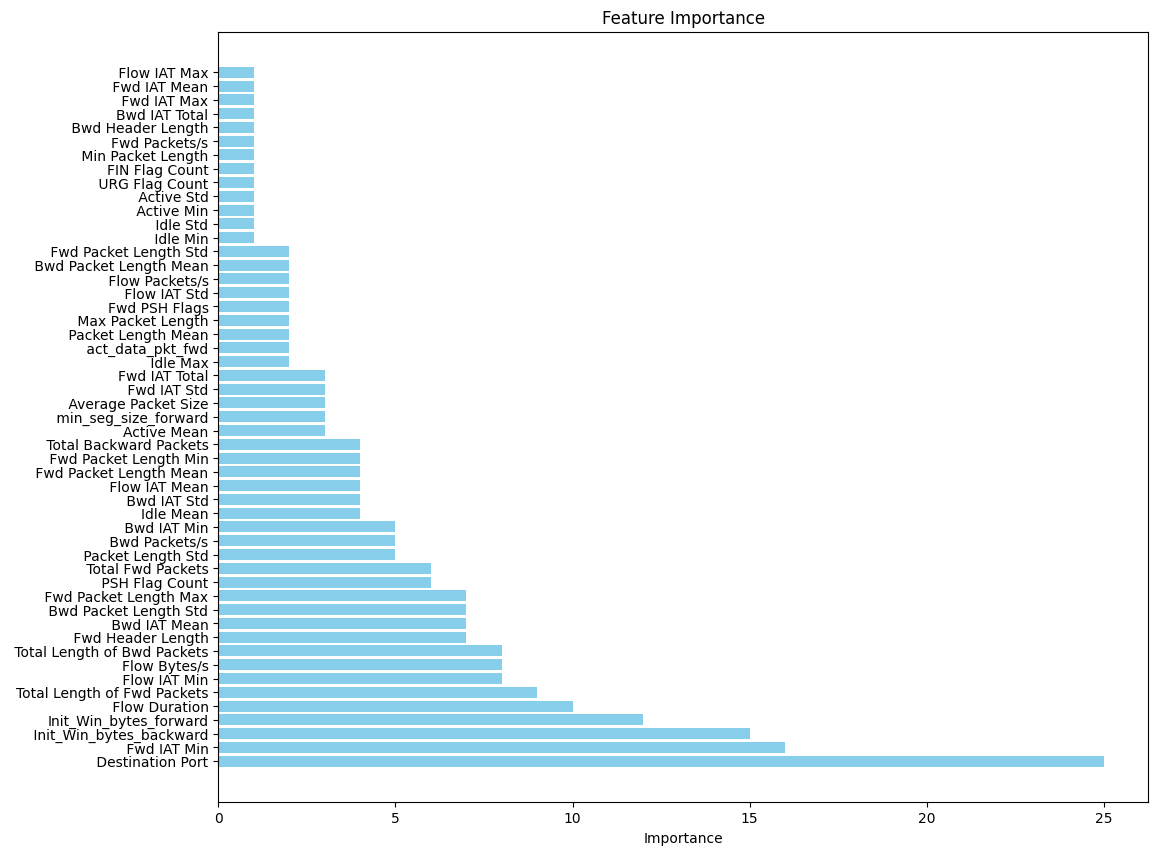

In [38]:
importance = model.get_score(importance_type='weight')
print("Feature Importance:", importance)

importance = dict(sorted(importance.items(),key=lambda item: item[1]))
# Extracting keys and values
features = list(importance.keys())
imp = list(importance.values())

# Plotting
plt.figure(figsize=(12, 10))
plt.barh(features, imp, color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.show()
